In [1]:
import torch
import torch.nn as nn
import torchquantum as tq
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor()])
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Define data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Define a custom quantum layer with parameters
class QuantumLayer(nn.Module):
    def __init__(self, input_size, output_size):
        super(QuantumLayer, self).__init__()
        # This is a placeholder; the actual quantum layer implementation may differ
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        # Apply some operations and return
        return self.fc(x)

# Define the quantum neural network model
class QuantumNeuralNetwork(nn.Module):
    def __init__(self):
        super(QuantumNeuralNetwork, self).__init__()
        self.q_layer1 = QuantumLayer(28*28, 128)  # Define custom quantum layer
        self.q_layer2 = QuantumLayer(128, 10)  # Define custom quantum layer

    def forward(self, x):
        x = self.q_layer1(x)
        # Apply a quantum operation
        # Note: Modify based on how torchquantum expects quantum operations to be applied
        x = torch.relu(x)
        x = self.q_layer2(x)
        return x

# Initialize the model, loss function, and optimizer
model = QuantumNeuralNetwork()
criterion = nn.CrossEntropyLoss()
# Initialize the model
model = QuantumNeuralNetwork()

# Define the optimizer with a specific learning rate
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)

# Train the model
for epoch in range(10):  # train for 10 epochs
    for i, (images, labels) in enumerate(train_loader):
        images = images.view(-1, 28*28)  # flatten the images
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        if i % 100 == 0:
            print(f'Epoch {epoch+1}, Batch {i+1}, Loss: {loss.item()}')

# Evaluate the model
model.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

accuracy = correct / len(test_loader.dataset)
print(f'Test Loss: {test_loss / len(test_loader)}')
print(f'Test Accuracy: {accuracy:.2f}%')


Epoch 1, Batch 1, Loss: 2.307175636291504
Epoch 1, Batch 101, Loss: 0.5462241768836975
Epoch 1, Batch 201, Loss: 0.43092235922813416
Epoch 1, Batch 301, Loss: 0.24106237292289734
Epoch 1, Batch 401, Loss: 0.41574496030807495
Epoch 1, Batch 501, Loss: 0.2840423285961151
Epoch 1, Batch 601, Loss: 0.09946101158857346
Epoch 1, Batch 701, Loss: 0.143565371632576
Epoch 1, Batch 801, Loss: 0.17457278072834015
Epoch 1, Batch 901, Loss: 0.0816253051161766
Epoch 2, Batch 1, Loss: 0.21907435357570648
Epoch 2, Batch 101, Loss: 0.08158065378665924
Epoch 2, Batch 201, Loss: 0.018234001472592354
Epoch 2, Batch 301, Loss: 0.2183181345462799
Epoch 2, Batch 401, Loss: 0.051543429493904114
Epoch 2, Batch 501, Loss: 0.04104265198111534
Epoch 2, Batch 601, Loss: 0.12529121339321136
Epoch 2, Batch 701, Loss: 0.097201868891716
Epoch 2, Batch 801, Loss: 0.14837485551834106
Epoch 2, Batch 901, Loss: 0.05600589141249657
Epoch 3, Batch 1, Loss: 0.051546476781368256
Epoch 3, Batch 101, Loss: 0.03604249656200409
E

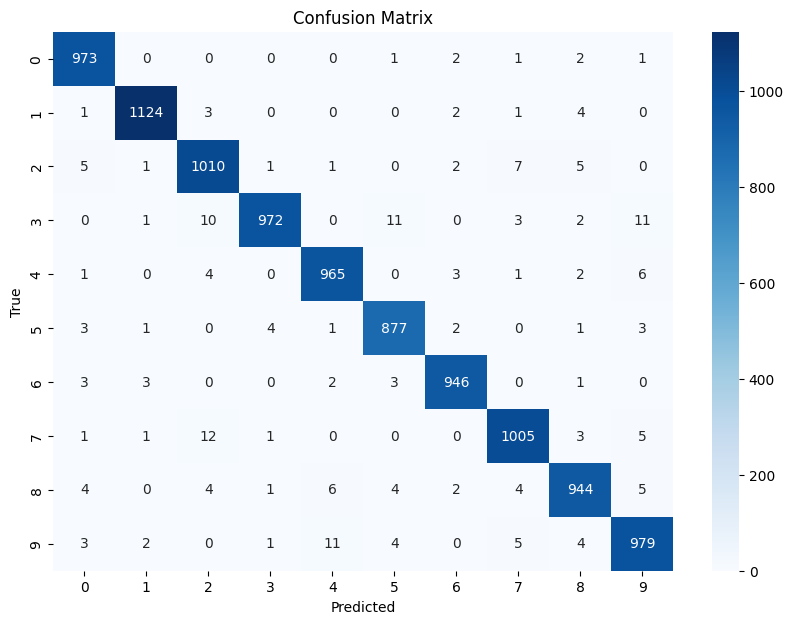

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Assuming you have y_true and y_pred
y_true = []
y_pred = []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

plot_confusion_matrix(y_true, y_pred, classes=[str(i) for i in range(10)])


In [3]:
import matplotlib.pyplot as plt
import torch

def plot_misclassified_examples(images, labels, predictions, save_path):
    misclassified_indices = [i for i in range(len(labels)) if labels[i] != predictions[i]]
    num_examples = min(len(misclassified_indices), 49)  # Display at most 49 examples for 7x7 grid
    plt.figure(figsize=(14, 14))  # Adjust figure size for 7x7 grid
    for i, index in enumerate(misclassified_indices[:num_examples]):
        plt.subplot(7, 7, i+1)  # 7x7 grid
        plt.imshow(images[index].reshape(28, 28), cmap='gray')
        plt.title(f'T: {labels[index]}, P: {predictions[index]}', fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path, dpi=240)  # Save the plot with 240 DPI
    plt.close()

# Collect misclassified examples
misclassified_images = []
misclassified_labels = []
misclassified_predictions = []
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    for i in range(len(labels)):
        if labels[i] != predicted[i]:
            misclassified_images.append(images[i].cpu().numpy())
            misclassified_labels.append(labels[i].cpu().numpy())
            misclassified_predictions.append(predicted[i].cpu().numpy())

# Define the path where the plot will be saved
save_path = './images/misclassified_examples.png'
plot_misclassified_examples(misclassified_images, misclassified_labels, misclassified_predictions, save_path)


In [7]:

import torch.nn.functional as F

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Train and evaluate a classical model
simple_nn = SimpleNN()
optimizer = torch.optim.Adam(simple_nn.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

# Training loop for classical model (similar to QNN training loop)

# Evaluation loop for classical model
simple_nn.eval()
test_loss = 0
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28*28)
        outputs = simple_nn(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()

accuracy = correct / len(test_loader.dataset)
print(f'Classical Model Test Loss: {test_loss / len(test_loader)}')
print(f'Classical Model Test Accuracy: {accuracy:.2f}%')


Classical Model Test Loss: 2.296474585867232
Classical Model Test Accuracy: 0.11%


In [5]:

def plot_correctly_classified_examples(images, labels, predictions, save_path):
    correctly_classified_indices = [i for i in range(len(labels)) if labels[i] == predictions[i]]
    num_examples = min(len(correctly_classified_indices), 49)  # Display at most 49 examples for 7x7 grid
    plt.figure(figsize=(14, 14))  # Adjust figure size for 7x7 grid
    for i, index in enumerate(correctly_classified_indices[:num_examples]):
        plt.subplot(7, 7, i+1)  # 7x7 grid
        plt.imshow(images[index].reshape(28, 28), cmap='gray')
        plt.title(f'T: {labels[index]}, P: {predictions[index]}', fontsize=8)
        plt.axis('off')
    plt.tight_layout()
    plt.savefig(save_path, dpi=240)  # Save the plot with 240 DPI
    plt.close()

# Collect correctly classified examples
correct_images = []
correct_labels = []
correct_predictions = []
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    for i in range(len(labels)):
        if labels[i] == predicted[i]:  # Only store correctly classified examples
            correct_images.append(images[i].cpu().numpy())
            correct_labels.append(labels[i].cpu().numpy())
            correct_predictions.append(predicted[i].cpu().numpy())

# Define the path where the plot will be saved
save_path = './images/correctly_classified_examples.png'
plot_correctly_classified_examples(correct_images, correct_labels, correct_predictions, save_path)


In [6]:
# Initialize counters for correct and total predictions
correct = 0
total = 0

# Iterate through test dataset to calculate correct predictions
for images, labels in test_loader:
    images = images.view(-1, 28*28)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Increment total count
    total += labels.size(0)
    
    # Increment correct count if prediction matches the label
    correct += (predicted == labels).sum().item()

# Calculate and print the ratio
ratio = correct / total
print(f'Correctly Classified: {correct} out of {total}')
print(f'Ratio of correctly classified examples: {ratio:.4f}')


Correctly Classified: 9795 out of 10000
Ratio of correctly classified examples: 0.9795
